## Import libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np

## Connect to the database

In [2]:
con = sqlite3.connect('cademycode.db')
cur = con.cursor()

In [3]:
# Get a list of the table names
table_list = [x for x in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(table_list)

[('cademycode_students',), ('cademycode_courses',), ('cademycode_student_jobs',)]


In [4]:
students = pd.read_sql_query("SELECT * FROM cademycode_students", con)
career_paths = pd.read_sql_query("SELECT * FROM cademycode_courses", con)
student_jobs = pd.read_sql_query("SELECT * FROM cademycode_student_jobs", con)

In [5]:
# Check the size of the tables
print('students:', len(students))
print('career_paths:', len(career_paths))
print('student_jobs:', len(student_jobs))

students: 5000
career_paths: 10
student_jobs: 13


## Working with the `students` table

In [6]:
students.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7.0,6.0,1.0,4.99
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7.0,5.0,8.0,4.4
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7.0,8.0,8.0,6.74
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6.0,7.0,9.0,12.31
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7.0,14.0,3.0,5.64


In [7]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    5000 non-null   int64 
 1   name                    5000 non-null   object
 2   dob                     5000 non-null   object
 3   sex                     5000 non-null   object
 4   contact_info            5000 non-null   object
 5   job_id                  4995 non-null   object
 6   num_course_taken        4749 non-null   object
 7   current_career_path_id  4529 non-null   object
 8   time_spent_hrs          4529 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [8]:
students[students.isnull().any(axis=1)]

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
15,16,Norene Dalton,1976-04-30,F,"{""mailing_address"": ""130 Wishing Essex, Branch...",6.0,0.0,None,None
19,20,Sofia van Steenbergen,1990-02-21,N,"{""mailing_address"": ""634 Clear Barn Dell, Beam...",7.0,13.0,None,None
25,26,Doug Browning,1970-06-08,M,"{""mailing_address"": ""P.O. Box 15845, Devine, F...",7.0,None,5.0,1.92
26,27,Damon Schrauwen,1953-10-31,M,"{""mailing_address"": ""P.O. Box 84659, Maben, Ge...",4.0,None,10.0,3.73
30,31,Christoper Warner,1989-12-28,M,"{""mailing_address"": ""556 Stony Highlands, Drai...",2.0,5.0,None,None
...,...,...,...,...,...,...,...,...,...
4948,4949,Dewitt van Malsem,1949-03-08,M,"{""mailing_address"": ""423 Course Trail, Wilmot,...",4.0,7.0,None,None
4956,4957,Todd Stamhuis,1961-06-15,M,"{""mailing_address"": ""251 Grand Rose Underpass,...",7.0,8.0,None,None
4974,4975,Jorge Creelman,1944-11-24,M,"{""mailing_address"": ""919 Well Overpass, Linden...",2.0,15.0,None,None
4980,4981,Brice Franklin,1946-12-01,M,"{""mailing_address"": ""947 Panda Way, New Bedfor...",4.0,None,5.0,8.66


## Calculating approximate age

In [9]:
from datetime import datetime

students['age'] = (datetime.now() - pd.to_datetime(students['dob'])).astype('<m8[Y]')

In [10]:
students['age group'] = np.int64((students['age']/10))*10

In [11]:
students.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age group
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7.0,6.0,1.0,4.99,80.0,80
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7.0,5.0,8.0,4.4,32.0,30
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7.0,8.0,8.0,6.74,34.0,30
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6.0,7.0,9.0,12.31,35.0,30
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7.0,14.0,3.0,5.64,60.0,60


In [13]:
print(students['contact_info'][0])

{"mailing_address": "303 N Timber Key, Irondale, Wisconsin, 84736", "email": "annabelle_avery9376@woohoo.com"}


In [14]:
type(students['contact_info'][0])

str

## Parsing `contact_info`

In [17]:
import json

# Function to parse 'contact_info' column
def parse_contact_info(contact_info):
    try:
        # Convert string to dictionary using json.loads
        contact_dict = json.loads(contact_info)
        return pd.Series(contact_dict)
    except json.JSONDecodeError:
        return pd.Series({})

In [18]:
# Apply the function to 'contact_info' column
explode_contact = students['contact_info'].apply(parse_contact_info)

explode_contact.head()

,mailing_address,email
0,"303 N Timber Key, Irondale, Wisconsin, 84736",annabelle_avery9376@woohoo.com
1,"767 Crescent Fair, Shoals, Indiana, 37439",rubio6772@hmail.com
2,"P.O. Box 41269, St. Bonaventure, Virginia, 83637",hosea_dale8084@coldmail.com
3,"517 SE Wintergreen Isle, Lane, Arkansas, 82242",kirk4005@hmail.com
4,"18 Cinder Cliff, Doyles borough, Rhode Island,...",alexander9810@hmail.com


In [19]:
# Concatenate it to our 'students' table to get a full picture
students = pd.concat([students, explode_contact], axis=1)

In [20]:
students.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age group,mailing_address,email
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7.0,6.0,1.0,4.99,80.0,80,"303 N Timber Key, Irondale, Wisconsin, 84736",annabelle_avery9376@woohoo.com
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7.0,5.0,8.0,4.4,32.0,30,"767 Crescent Fair, Shoals, Indiana, 37439",rubio6772@hmail.com
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7.0,8.0,8.0,6.74,34.0,30,"P.O. Box 41269, St. Bonaventure, Virginia, 83637",hosea_dale8084@coldmail.com
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6.0,7.0,9.0,12.31,35.0,30,"517 SE Wintergreen Isle, Lane, Arkansas, 82242",kirk4005@hmail.com
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7.0,14.0,3.0,5.64,60.0,60,"18 Cinder Cliff, Doyles borough, Rhode Island,...",alexander9810@hmail.com


In [22]:
# Drop the 'contact_info' column
students = students.drop('contact_info', axis=1)
students.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age group,mailing_address,email
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,80.0,80,"303 N Timber Key, Irondale, Wisconsin, 84736",annabelle_avery9376@woohoo.com
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.4,32.0,30,"767 Crescent Fair, Shoals, Indiana, 37439",rubio6772@hmail.com
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,34.0,30,"P.O. Box 41269, St. Bonaventure, Virginia, 83637",hosea_dale8084@coldmail.com
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,35.0,30,"517 SE Wintergreen Isle, Lane, Arkansas, 82242",kirk4005@hmail.com
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,60.0,60,"18 Cinder Cliff, Doyles borough, Rhode Island,...",alexander9810@hmail.com


In [23]:
# Split the 'mailing_address' column into multiple columns
split_address = students.mailing_address.str.split(',', expand=True)
split_address.columns = ['street', 'city', 'state', 'zip_code']
students = pd.concat([students.drop('mailing_address', axis=1), split_address], axis=1)
students.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age group,email,street,city,state,zip_code
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,80.0,80,annabelle_avery9376@woohoo.com,303 N Timber Key,Irondale,Wisconsin,84736
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.4,32.0,30,rubio6772@hmail.com,767 Crescent Fair,Shoals,Indiana,37439
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,34.0,30,hosea_dale8084@coldmail.com,P.O. Box 41269,St. Bonaventure,Virginia,83637
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,35.0,30,kirk4005@hmail.com,517 SE Wintergreen Isle,Lane,Arkansas,82242
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,60.0,60,alexander9810@hmail.com,18 Cinder Cliff,Doyles borough,Rhode Island,73737


In [24]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    5000 non-null   int64  
 1   name                    5000 non-null   object 
 2   dob                     5000 non-null   object 
 3   sex                     5000 non-null   object 
 4   job_id                  4995 non-null   object 
 5   num_course_taken        4749 non-null   object 
 6   current_career_path_id  4529 non-null   object 
 7   time_spent_hrs          4529 non-null   object 
 8   age                     5000 non-null   float64
 9   age group               5000 non-null   int64  
 10  email                   5000 non-null   object 
 11  street                  5000 non-null   object 
 12  city                    5000 non-null   object 
 13  state                   5000 non-null   object 
 14  zip_code                5000 non-null   

## Fixing column data types

In [25]:
students['job_id'] = students['job_id'].astype(float)
students['current_career_path_id'] = students['current_career_path_id'].astype(float)
students['num_course_taken'] = students['num_course_taken'].astype(float)
students['time_spent_hrs'] = students['time_spent_hrs'].astype(float)

In [26]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    5000 non-null   int64  
 1   name                    5000 non-null   object 
 2   dob                     5000 non-null   object 
 3   sex                     5000 non-null   object 
 4   job_id                  4995 non-null   float64
 5   num_course_taken        4749 non-null   float64
 6   current_career_path_id  4529 non-null   float64
 7   time_spent_hrs          4529 non-null   float64
 8   age                     5000 non-null   float64
 9   age group               5000 non-null   int64  
 10  email                   5000 non-null   object 
 11  street                  5000 non-null   object 
 12  city                    5000 non-null   object 
 13  state                   5000 non-null   object 
 14  zip_code                5000 non-null   

## Handling missing data

### `num_course_taken`

In [27]:
missing_course_taken = students[students[['num_course_taken']].isnull().any(axis=1)]
display(missing_course_taken)

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age group,email,street,city,state,zip_code
25,26,Doug Browning,1970-06-08,M,7.0,NaN,5.0,1.92,53.0,50,doug7761@inlook.com,P.O. Box 15845,Devine,Florida,23097
26,27,Damon Schrauwen,1953-10-31,M,4.0,NaN,10.0,3.73,70.0,70,damon9864@woohoo.com,P.O. Box 84659,Maben,Georgia,66137
51,52,Alisa Neil,1977-05-28,F,5.0,NaN,8.0,22.86,46.0,40,alisa9616@inlook.com,16 View Annex,Mosses,North Dakota,25748
70,71,Chauncey Hooper,1962-04-07,M,3.0,NaN,3.0,3.97,61.0,60,chauncey6352@woohoo.com,955 Dewy Flat,Slaughterville,South Carolina,22167
80,81,Ellyn van Heest,1984-06-28,F,3.0,NaN,10.0,12.39,39.0,30,ellyn_vanheest8375@hmail.com,872 Cider Glade,Chicken,Delaware,42689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,4890,Tegan Cochran,1970-11-08,F,5.0,NaN,8.0,22.75,53.0,50,tegan130@inlook.com,106 Sunny Nook,Vernal,Georgia,10769
4898,4899,Ruthann Oliver,1998-05-22,F,3.0,NaN,7.0,21.27,25.0,20,ruthann1124@woohoo.com,644 Merry Island,Green Valley,Wyoming,91273
4914,4915,Ernest Holmes,1995-03-11,M,7.0,NaN,9.0,26.50,28.0,20,ernest_holmes505@hmail.com,872 Wintergreen Harbor,Gallitzin borough,Maine,50103
4980,4981,Brice Franklin,1946-12-01,M,4.0,NaN,5.0,8.66,77.0,70,brice9741@coldmail.com,947 Panda Way,New Bedford village,Vermont,31232


<Axes: xlabel='sex'>

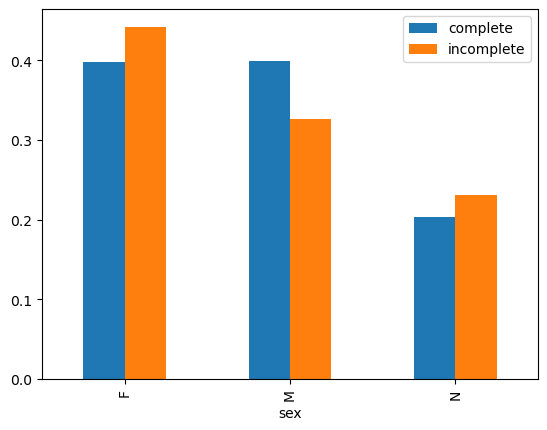

In [28]:
# Taking a look at the distribution of missing and complete data by our categorical features

# Data grouped by 'sex'
sg = (students.groupby('sex').count()['uuid']/len(students)).rename('complete')
mg = (missing_course_taken.groupby('sex').count()['uuid']/len(missing_course_taken)).rename('incomplete')
df = pd.concat([sg, mg], axis=1)
df.plot.bar()

<Axes: xlabel='job_id'>

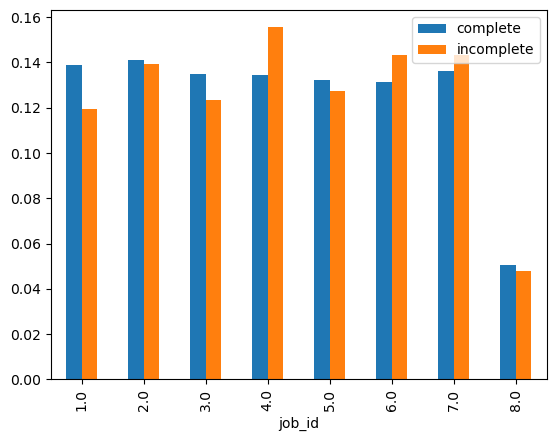

In [29]:
# Data grouped by 'job_id'
sg = (students.groupby('job_id').count()['uuid']/len(students)).rename('complete')
mg = (missing_course_taken.groupby('job_id').count()['uuid']/len(missing_course_taken)).rename('incomplete')
df = pd.concat([sg, mg], axis=1)
df.plot.bar()

<Axes: xlabel='age group'>

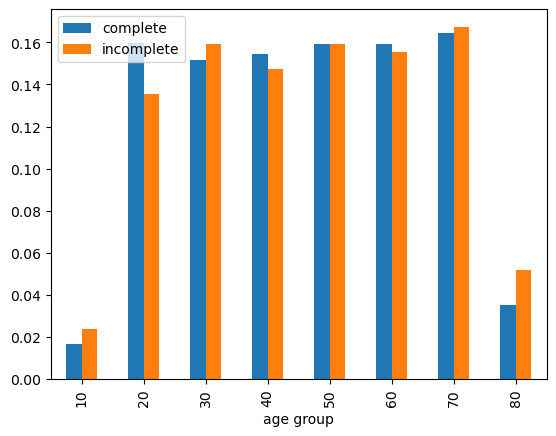

In [31]:
# Data grouped by 'age_group'
sg = (students.groupby('age group').count()['uuid']/len(students)).rename('complete')
mg = (missing_course_taken.groupby('age group').count()['uuid']/len(missing_course_taken)).rename('incomplete')
df = pd.concat([sg, mg], axis=1)
df.plot.bar()

In [32]:
students = students.rename(columns={'age group': 'age_group'})

In [33]:
students.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,80.0,80,annabelle_avery9376@woohoo.com,303 N Timber Key,Irondale,Wisconsin,84736
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.40,32.0,30,rubio6772@hmail.com,767 Crescent Fair,Shoals,Indiana,37439
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,34.0,30,hosea_dale8084@coldmail.com,P.O. Box 41269,St. Bonaventure,Virginia,83637
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,35.0,30,kirk4005@hmail.com,517 SE Wintergreen Isle,Lane,Arkansas,82242
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,60.0,60,alexander9810@hmail.com,18 Cinder Cliff,Doyles borough,Rhode Island,73737


In [34]:
missing_data = pd.DataFrame()
missing_data = pd.concat([missing_data, missing_course_taken])
students = students.dropna(subset=['num_course_taken'])

In [35]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4749 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4749 non-null   int64  
 1   name                    4749 non-null   object 
 2   dob                     4749 non-null   object 
 3   sex                     4749 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4749 non-null   float64
 6   current_career_path_id  4298 non-null   float64
 7   time_spent_hrs          4298 non-null   float64
 8   age                     4749 non-null   float64
 9   age_group               4749 non-null   int64  
 10  email                   4749 non-null   object 
 11  street                  4749 non-null   object 
 12  city                    4749 non-null   object 
 13  state                   4749 non-null   object 
 14  zip_code                4749 non-null   

### `job_id`

In [36]:
missing_job_id = students[students[['job_id']].isnull().any(axis=1)]
missing_job_id.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code
162,163,Glen Riley,2002-08-22,M,NaN,8.0,3.0,5.70,21.0,20,glen_riley4484@hmail.com,P.O. Box 37267,Cornlea village,Tennessee,19192
757,758,Mercedez Vorberg,2002-03-25,F,NaN,15.0,4.0,4.14,21.0,20,mercedez6297@woohoo.com,284 Cedar Seventh,Virden village,Washington,60489
854,855,Kurt Ho,2002-05-29,M,NaN,0.0,8.0,23.72,21.0,20,ho6107@inlook.com,P.O. Box 27254,Olin,New Hampshire,60067
1029,1030,Penny Gaines,2002-03-01,N,NaN,15.0,4.0,16.25,21.0,20,gaines2897@hmail.com,138 Misty Vale,Stockton borough,West Virginia,53630
1542,1543,Frederick Reilly,2002-11-13,M,NaN,7.0,9.0,21.32,21.0,20,frederick_reilly6971@woohoo.com,P.O. Box 40769,Quakervillage,Maryland,96218


In [37]:
missing_data = pd.concat([missing_data, missing_job_id])
students = students.dropna(subset=['job_id'])

In [38]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4744 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4744 non-null   float64
 6   current_career_path_id  4293 non-null   float64
 7   time_spent_hrs          4293 non-null   float64
 8   age                     4744 non-null   float64
 9   age_group               4744 non-null   int64  
 10  email                   4744 non-null   object 
 11  street                  4744 non-null   object 
 12  city                    4744 non-null   object 
 13  state                   4744 non-null   object 
 14  zip_code                4744 non-null   

### `current_career_path_id`

In [39]:
missing_path_id = missing_job_id = students[students[['current_career_path_id']].isnull().any(axis=1)]
missing_path_id.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code
15,16,Norene Dalton,1976-04-30,F,6.0,0.0,NaN,NaN,47.0,40,norene_dalton9509@hmail.com,130 Wishing Essex,Branch,Ohio,13616
19,20,Sofia van Steenbergen,1990-02-21,N,7.0,13.0,NaN,NaN,33.0,30,vansteenbergen8482@inlook.com,634 Clear Barn Dell,Beaman,Georgia,33288
30,31,Christoper Warner,1989-12-28,M,2.0,5.0,NaN,NaN,34.0,30,warner5906@coldmail.com,556 Stony Highlands,Drain,Illinois,01973
49,50,Antony Horne,1996-05-29,M,3.0,2.0,NaN,NaN,27.0,20,antony577@coldmail.com,P.O. Box 78685,Lenox,Texas,15516
54,55,Omar Bunk,1955-11-08,M,3.0,14.0,NaN,NaN,68.0,60,omar1245@coldmail.com,445 Dale Hollow,Vermont village,South Carolina,28329


It appears that `time_spent_hrs` and the corresponding `current_career_path_id` columns are both missing. It is possible they are structurally missing, so I will investigate.

In [40]:
missing_path_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 15 to 4974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    451 non-null    int64  
 1   name                    451 non-null    object 
 2   dob                     451 non-null    object 
 3   sex                     451 non-null    object 
 4   job_id                  451 non-null    float64
 5   num_course_taken        451 non-null    float64
 6   current_career_path_id  0 non-null      float64
 7   time_spent_hrs          0 non-null      float64
 8   age                     451 non-null    float64
 9   age_group               451 non-null    int64  
 10  email                   451 non-null    object 
 11  street                  451 non-null    object 
 12  city                    451 non-null    object 
 13  state                   451 non-null    object 
 14  zip_code                451 non-null    

Any time `current_career_path_id` is missing `time_spent_hrs` is also missing.
We can resonably conclude this is structurally missing.

In [41]:
# All the categories for current_career_path
students['current_career_path_id'].unique()

array([ 1.,  8.,  9.,  3.,  6., 10.,  5., nan,  4.,  7.,  2.])

In [42]:
# Create a new ID to indicate no current career path and set its time spent in hours to zero
students['current_career_path_id'] = np.where(
    students['current_career_path_id'].isnull(), 0, students['current_career_path_id'])
students['time_spent_hrs'] = np.where(students['time_spent_hrs'].isnull(), 0, students['time_spent_hrs'])

In [43]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4744 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4744 non-null   float64
 6   current_career_path_id  4744 non-null   float64
 7   time_spent_hrs          4744 non-null   float64
 8   age                     4744 non-null   float64
 9   age_group               4744 non-null   int64  
 10  email                   4744 non-null   object 
 11  street                  4744 non-null   object 
 12  city                    4744 non-null   object 
 13  state                   4744 non-null   object 
 14  zip_code                4744 non-null   

## Working with the `career_paths` table

In [44]:
display(career_paths)

,career_path_id,career_path_name,hours_to_complete
0,1,data scientist,20
1,2,data engineer,20
2,3,data analyst,12
3,4,software engineering,25
4,5,backend engineer,18
5,6,frontend engineer,20
6,7,iOS developer,27
7,8,android developer,27
8,9,machine learning engineer,35
9,10,ux/ui designer,15


In [45]:
career_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   career_path_id     10 non-null     int64 
 1   career_path_name   10 non-null     object
 2   hours_to_complete  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [46]:
# Add a 'career_path_id' to account for students without a current career path
not_applicable = {'career_path_id': 0,
                 'career_path_name': 'not applicable',
                 'hours_to_complete': 0}

career_paths.loc[len(career_paths)] = not_applicable

In [47]:
display(career_paths)

,career_path_id,career_path_name,hours_to_complete
0,1,data scientist,20
1,2,data engineer,20
2,3,data analyst,12
3,4,software engineering,25
4,5,backend engineer,18
5,6,frontend engineer,20
6,7,iOS developer,27
7,8,android developer,27
8,9,machine learning engineer,35
9,10,ux/ui designer,15


## Working with the `student_jobs` table

In [48]:
display(student_jobs)

,job_id,job_category,avg_salary
0,1,analytics,86000
1,2,engineer,101000
2,3,software developer,110000
3,4,creative,66000
4,5,financial services,135000
5,6,education,61000
6,7,HR,80000
7,8,student,10000
8,9,healthcare,120000
9,0,other,80000


In [49]:
student_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        13 non-null     int64 
 1   job_category  13 non-null     object
 2   avg_salary    13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 444.0+ bytes


In [50]:
student_jobs.drop_duplicates(inplace=True)
display(student_jobs)

,job_id,job_category,avg_salary
0,1,analytics,86000
1,2,engineer,101000
2,3,software developer,110000
3,4,creative,66000
4,5,financial services,135000
5,6,education,61000
6,7,HR,80000
7,8,student,10000
8,9,healthcare,120000
9,0,other,80000


## Joining tables

In [51]:
final_df = students.merge(career_paths, left_on='current_career_path_id', right_on='career_path_id', how='left')

In [53]:
final_df = final_df.merge(student_jobs, on='job_id', how='left')

In [54]:
final_df.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code,career_path_id,career_path_name,hours_to_complete,job_category,avg_salary
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,80.0,80,annabelle_avery9376@woohoo.com,303 N Timber Key,Irondale,Wisconsin,84736,1,data scientist,20,HR,80000
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.40,32.0,30,rubio6772@hmail.com,767 Crescent Fair,Shoals,Indiana,37439,8,android developer,27,HR,80000
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,34.0,30,hosea_dale8084@coldmail.com,P.O. Box 41269,St. Bonaventure,Virginia,83637,8,android developer,27,HR,80000
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,35.0,30,kirk4005@hmail.com,517 SE Wintergreen Isle,Lane,Arkansas,82242,9,machine learning engineer,35,education,61000
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,60.0,60,alexander9810@hmail.com,18 Cinder Cliff,Doyles borough,Rhode Island,73737,3,data analyst,12,HR,80000


In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4744 entries, 0 to 4743
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4744 non-null   float64
 6   current_career_path_id  4744 non-null   float64
 7   time_spent_hrs          4744 non-null   float64
 8   age                     4744 non-null   float64
 9   age_group               4744 non-null   int64  
 10  email                   4744 non-null   object 
 11  street                  4744 non-null   object 
 12  city                    4744 non-null   object 
 13  state                   4744 non-null   object 
 14  zip_code                4744 non-null   

## Upsert cleansed and missing data tables to a new SQLite DB

In [56]:
# Create new database with cleansed data
sqlite_connection = sqlite3.connect('cademycode_cleansed.db')

In [57]:
# Upsert final DataFrame into the database called 'cademycode_aggregated'
final_df.to_sql('cademycode_aggregated', sqlite_connection, if_exists='replace', index=False)

4744

In [58]:
db_df = pd.read_sql_query("SELECT * FROM cademycode_aggregated", sqlite_connection)

In [59]:
db_df.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code,career_path_id,career_path_name,hours_to_complete,job_category,avg_salary
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,80.0,80,annabelle_avery9376@woohoo.com,303 N Timber Key,Irondale,Wisconsin,84736,1,data scientist,20,HR,80000
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.40,32.0,30,rubio6772@hmail.com,767 Crescent Fair,Shoals,Indiana,37439,8,android developer,27,HR,80000
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,34.0,30,hosea_dale8084@coldmail.com,P.O. Box 41269,St. Bonaventure,Virginia,83637,8,android developer,27,HR,80000
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,35.0,30,kirk4005@hmail.com,517 SE Wintergreen Isle,Lane,Arkansas,82242,9,machine learning engineer,35,education,61000
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,60.0,60,alexander9810@hmail.com,18 Cinder Cliff,Doyles borough,Rhode Island,73737,3,data analyst,12,HR,80000


In [60]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4744 non-null   float64
 6   current_career_path_id  4744 non-null   float64
 7   time_spent_hrs          4744 non-null   float64
 8   age                     4744 non-null   float64
 9   age_group               4744 non-null   int64  
 10  email                   4744 non-null   object 
 11  street                  4744 non-null   object 
 12  city                    4744 non-null   object 
 13  state                   4744 non-null   object 
 14  zip_code                4744 non-null   

In [61]:
# Upsert missing data DataFrame with the name 'incomplete_data'
missing_data.to_sql('incomplete_data', sqlite_connection, if_exists='replace', index=False)

256

In [62]:
missing_df = pd.read_sql_query("SELECT * FROM incomplete_data", sqlite_connection)

In [63]:
missing_df.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age group,email,street,city,state,zip_code,age_group
0,26,Doug Browning,1970-06-08,M,7.0,NaN,5.0,1.92,53.0,50.0,doug7761@inlook.com,P.O. Box 15845,Devine,Florida,23097,NaN
1,27,Damon Schrauwen,1953-10-31,M,4.0,NaN,10.0,3.73,70.0,70.0,damon9864@woohoo.com,P.O. Box 84659,Maben,Georgia,66137,NaN
2,52,Alisa Neil,1977-05-28,F,5.0,NaN,8.0,22.86,46.0,40.0,alisa9616@inlook.com,16 View Annex,Mosses,North Dakota,25748,NaN
3,71,Chauncey Hooper,1962-04-07,M,3.0,NaN,3.0,3.97,61.0,60.0,chauncey6352@woohoo.com,955 Dewy Flat,Slaughterville,South Carolina,22167,NaN
4,81,Ellyn van Heest,1984-06-28,F,3.0,NaN,10.0,12.39,39.0,30.0,ellyn_vanheest8375@hmail.com,872 Cider Glade,Chicken,Delaware,42689,NaN


In [64]:
sqlite_connection.close()

## Create CSV file

In [65]:
db_df.to_csv('cademycode_cleansed.csv')